# CIFAR-10 Image Classification with CNN (TensorFlow)

This notebook demonstrates how to build a **Convolutional Neural Network (CNN)** to classify images from the **CIFAR-10** dataset using TensorFlow.

We'll cover:
- Loading and visualizing the dataset
- Building and training a CNN
- Understanding Conv, Pooling, Padding, Stride
- Evaluating performance
- Making predictions

## Step 1: Import Required Libraries
We start by importing TensorFlow, Keras layers, NumPy, Matplotlib, and the CIFAR-10 dataset.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10

## Step 2: Load and Preprocess CIFAR-10
The dataset has 60,000 32x32 color images in 10 classes, with 6,000 images per class. Let's load it and normalize pixel values to [0, 1].

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step


### Let's look at a few training samples with their class names.

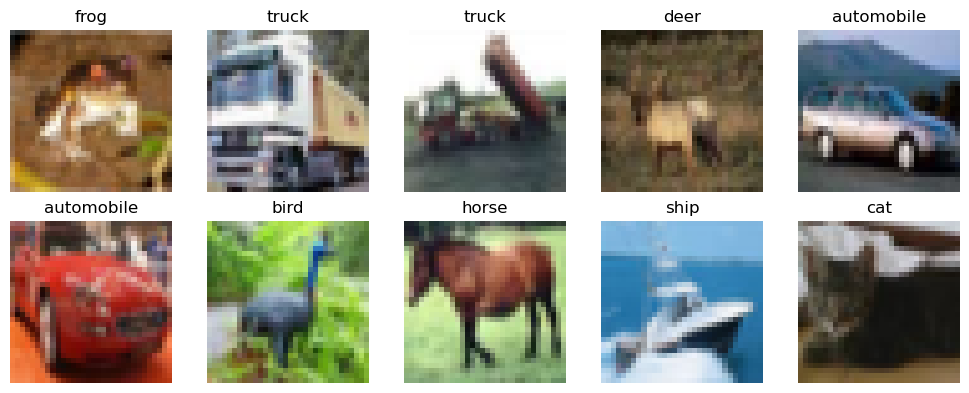

In [3]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.tight_layout()
plt.show()

## 🧱 Step 3: Build the CNN
We use:
- 3 convolutional blocks
- Max pooling to reduce spatial size
- ReLU activation
- Dropout to prevent overfitting
- Softmax for final classification

In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

/opt/homebrew/Caskroom/miniconda/base/envs/home/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Model Summary
Shows the shape of each layer and number of trainable parameters.

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,178 (1.22 MB)

 Trainable params: 319,178 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

## Step 4: Compile and Train the Model

We use:
- Adam optimizer
- Sparse categorical cross-entropy (as labels are not one-hot)
- Accuracy as metric

In [6]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=64)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.3384 - loss: 1.7764 - val_accuracy: 0.5176 - val_loss: 1.3642
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.4878 - loss: 1.4237 - val_accuracy: 0.6070 - val_loss: 1.1183
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.5493 - loss: 1.2648 - val_accuracy: 0.6372 - val_loss: 1.0441
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.5924 - loss: 1.1534 - val_accuracy: 0.6618 - val_loss: 0.9814
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.6218 - loss: 1.0683 - val_accuracy: 0.6924 - val_loss: 0.9271
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.6471 - loss: 1.0048 - val_accuracy: 0.7102 - val_loss: 0.8451
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.6696 - loss: 0.9452 - val_accuracy: 0.7194 - val_loss: 0.8194
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.6853 - loss: 0.8926 - 

## Step 5: Evaluate the Model
Now let's check how well our model performs on unseen test data.

In [7]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7149 - loss: 0.8511
Test accuracy: 0.71


## Step 6: Plot Accuracy and Loss
Let's visualize how accuracy and loss evolved during training.

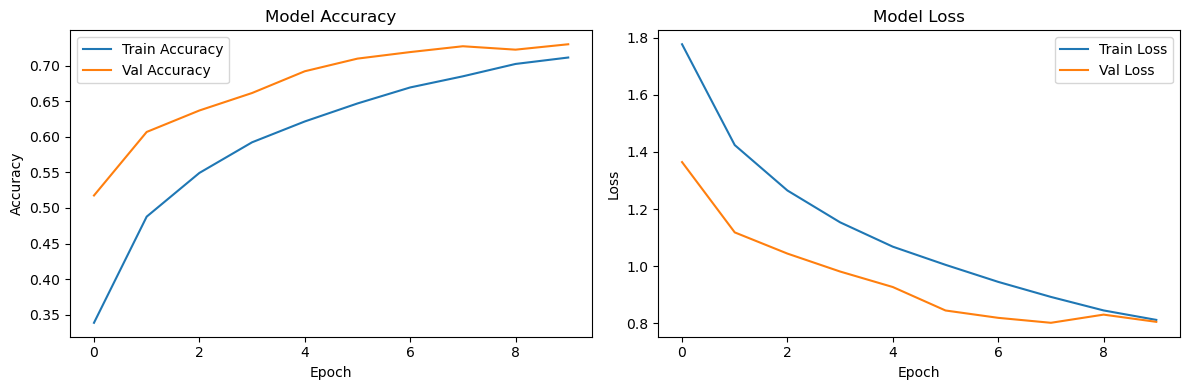

In [8]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Step 7: Make Predictions

We’ll predict a few samples from the test set and compare predicted vs actual labels.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


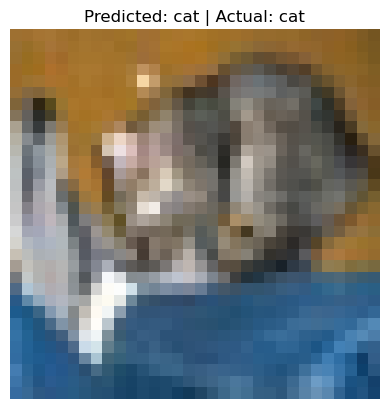

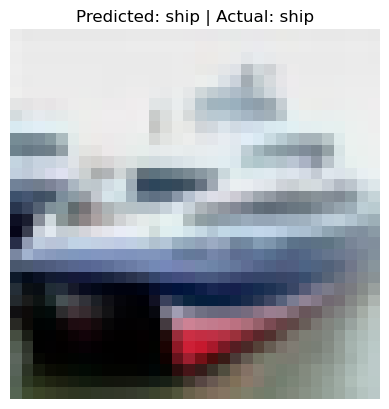

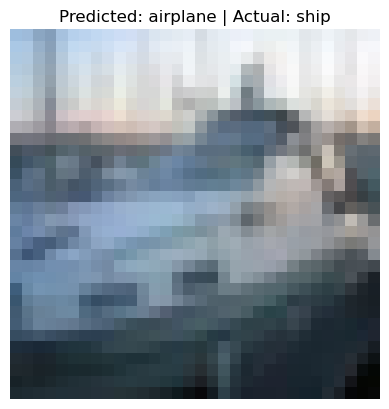

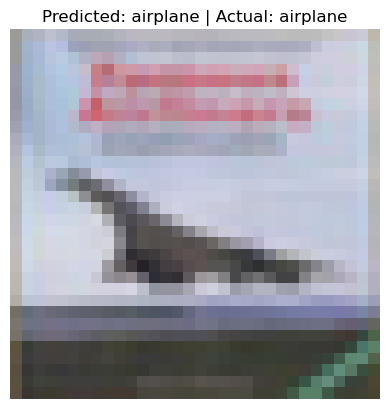

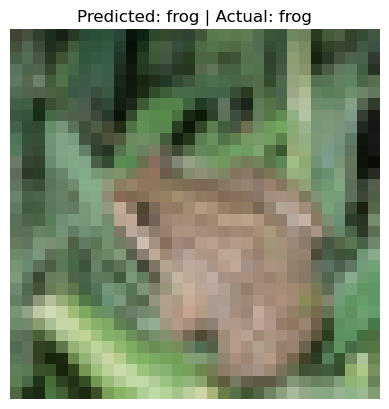

In [10]:
predictions = model.predict(X_test[:5])
predicted_labels = np.argmax(predictions, axis=1)

for i in range(5):
    plt.imshow(X_test[i])
    plt.title(f"Predicted: {class_names[predicted_labels[i]]} | Actual: {class_names[y_test[i][0]]}")
    plt.axis('off')
    plt.show()